# Exercise 2

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 
import math

In [6]:
# Create a Graph where you pass in a single list of integers along with a name and an
# operation. If the operation is a “+” , you add the elements and if it is a “*” , yOU
# multiply the elements, all within the same node.

# Input: {“name”: “Jack Sparrow”, “values”: [1,2,3,4] , “operation” : “*”}

class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str
    
    
def main(state: AgentState) -> AgentState:
    """Node that takes user's name, a list of integers, and an operation. Use these attributes to perform
    an operation on the list of integers """
    
    answer = False
    if state['operation'] == '*':
        answer = math.prod(state['values'])
    elif state['operation'] == '+':
        answer = sum(state['values'])
    else:
        state['result'] = 'Invalid!'
        
    
    state['result'] = f"Hi {state['name']}, your answer is {answer} "
    
    return state
    
    

In [7]:
graph = StateGraph(AgentState)

graph.add_node("main", main)

graph.set_entry_point("main")
graph.set_finish_point("main")

app = graph.compile()


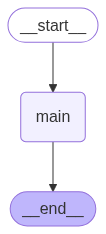

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
answers = app.invoke({'name': 'John', 'values': [1,2,3,4], 'operation': '+'})

In [18]:
print(answers['result'])

Hi John, your answer is 10 
